In [2]:
import numpy as np
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

# MovieLens 100k 데이터 불러오기
data = Dataset.load_builtin('ml-100k')

# Train / Test 분리
trainset, testset = train_test_split(data, test_size=0.25)

#### (1)
# 정확도 계산
algo = KNNWithMeans()
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9578


0.9578076774941977

In [3]:
algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]
names = []
results = []
for option in algorithms:
    algo = option()
    names.append(option.__name__)
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))


Estimating biases using als...
RMSE: 0.9505
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9578
RMSE: 0.9424
RMSE: 0.9245


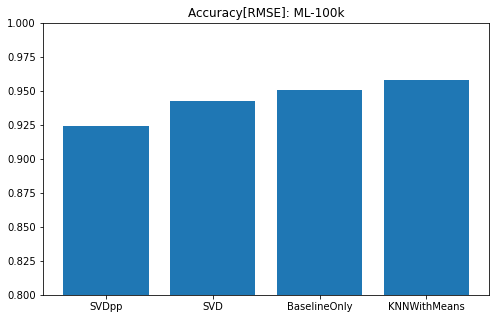

In [4]:
import matplotlib.pyplot as plt

names = np.array(names)
results = np.array(results)

index = np.argsort(results)
plt.figure(figsize=(8,5))
plt.title('Accuracy[RMSE]: ML-100k')
plt.ylim(0.8, 1)
plt.bar(names[index], results[index])
plt.savefig('Surprise using ml-100k.jpg')
plt.show()

In [5]:
#### (1)
# 알고리즘 옵션 변경, 정확도 계산
sim_options = {'name':'pearson_baseline',
               'user_based':True}
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9464


0.9463594685298664

In [6]:
result = []
for neighbor_size in (10,20,30,40,50,60):
    algo = KNNWithMeans(k=neighbor_size, sim_options={'name':'pearson_baseline',
                                                      'user_id':True})
    algo.fit(trainset)
    predictions = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(predictions)])
result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9600
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9484
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9464
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9460
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9465
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9467


[[10, 0.9600037493294182],
 [20, 0.9484483637527396],
 [30, 0.9463594685298664],
 [40, 0.9460004953548261],
 [50, 0.9465029683036292],
 [60, 0.9467348298753141]]

In [9]:
from surprise.model_selection import GridSearchCV
param_grid = {'k':[5,10,15,25],
              'sim_options':{'name':['pearson_baseline','cosine'],
                             'user_based':[True, False]}}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=4)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [18]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs':[70,80,90],
              'lr_all':[0.005,0.006,0.007],
              'reg_all':[0.05,0.07,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=4)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9125779415780021
{'n_epochs': 70, 'lr_all': 0.006, 'reg_all': 0.1}


In [19]:
gs.best_score

{'rmse': 0.9125779415780021}

In [20]:
gs.best_params

{'rmse': {'n_epochs': 70, 'lr_all': 0.006, 'reg_all': 0.1}}

In [22]:
import pandas as pd
# csv 파일에서 불러오기
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('C:/RecoSys/Data/u.data', sep='\t', names=r_cols, encoding='latin-1')
reader = Reader(rating_scale=(1,5)) # 평가 척도가 1~5임을 지정
data = Dataset.load_from_df(ratings[['user_id', 'movie_id','rating']], reader=reader)
data